In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('bitcoin_last_year.csv', encoding='utf8')

# take a look at the dataset
df.head()

,Day,Date,Open,High,Low,Close,Volume,Market Cap
0,1,6-Mar-23,"$22,436.82","$22,584.29","$22,331.31","$22,429.76","$17,353,192,895","$433,122,543,176"
1,2,7-Mar-23,"$22,428.32","$22,527.42","$22,011.26","$22,219.77","$22,765,452,204","$429,090,671,120"
2,3,8-Mar-23,"$22,216.44","$22,268.90","$21,708.05","$21,718.08","$22,536,575,684","$419,421,447,158"
3,4,9-Mar-23,"$21,720.08","$21,802.72","$20,210.31","$20,363.02","$30,364,664,171","$393,268,847,888"
4,5,10-Mar-23,"$20,367.00","$20,370.60","$19,628.25","$20,187.24","$39,578,257,695","$389,890,609,884"


In [3]:
df.describe

<bound method NDFrame.describe of      Day       Date         Open         High          Low        Close  \
0      1   6-Mar-23  $22,436.82   $22,584.29   $22,331.31   $22,429.76    
1      2   7-Mar-23  $22,428.32   $22,527.42   $22,011.26   $22,219.77    
2      3   8-Mar-23  $22,216.44   $22,268.90   $21,708.05   $21,718.08    
3      4   9-Mar-23  $21,720.08   $21,802.72   $20,210.31   $20,363.02    
4      5  10-Mar-23  $20,367.00   $20,370.60   $19,628.25   $20,187.24    
..   ...        ...          ...          ...          ...          ...   
359  360  28-Feb-24  $57,071.10   $63,913.13   $56,738.42   $62,504.79    
360  361  29-Feb-24  $62,499.18   $63,585.64   $60,498.73   $61,198.38    
361  362   1-Mar-24  $61,168.06   $63,155.10   $60,802.53   $62,440.63    
362  363   2-Mar-24  $62,431.65   $62,458.70   $61,657.29   $62,029.85    
363  364   3-Mar-24  $62,031.58   $63,230.21   $61,435.02   $63,167.37    

               Volume           Market Cap  
0    $17,353,192,895

In [4]:
cdf = df[['Day','Date','Open','High','Low','Close','Volume','Market Cap']]

cdf.head(9)

,Day,Date,Open,High,Low,Close,Volume,Market Cap
0,1,6-Mar-23,"$22,436.82","$22,584.29","$22,331.31","$22,429.76","$17,353,192,895","$433,122,543,176"
1,2,7-Mar-23,"$22,428.32","$22,527.42","$22,011.26","$22,219.77","$22,765,452,204","$429,090,671,120"
2,3,8-Mar-23,"$22,216.44","$22,268.90","$21,708.05","$21,718.08","$22,536,575,684","$419,421,447,158"
3,4,9-Mar-23,"$21,720.08","$21,802.72","$20,210.31","$20,363.02","$30,364,664,171","$393,268,847,888"
4,5,10-Mar-23,"$20,367.00","$20,370.60","$19,628.25","$20,187.24","$39,578,257,695","$389,890,609,884"
5,6,11-Mar-23,"$20,187.88","$20,792.53","$20,068.66","$20,632.41","$30,180,288,176","$398,509,689,462"
6,7,12-Mar-23,"$20,628.03","$22,185.03","$20,448.81","$22,163.95","$29,279,035,521","$428,114,557,465"
7,8,13-Mar-23,"$22,156.41","$24,550.84","$21,918.20","$24,197.53","$49,466,362,688","$467,417,380,967"
8,9,14-Mar-23,"$24,201.77","$26,514.72","$24,081.18","$24,746.07","$54,622,230,164","$478,037,073,215"


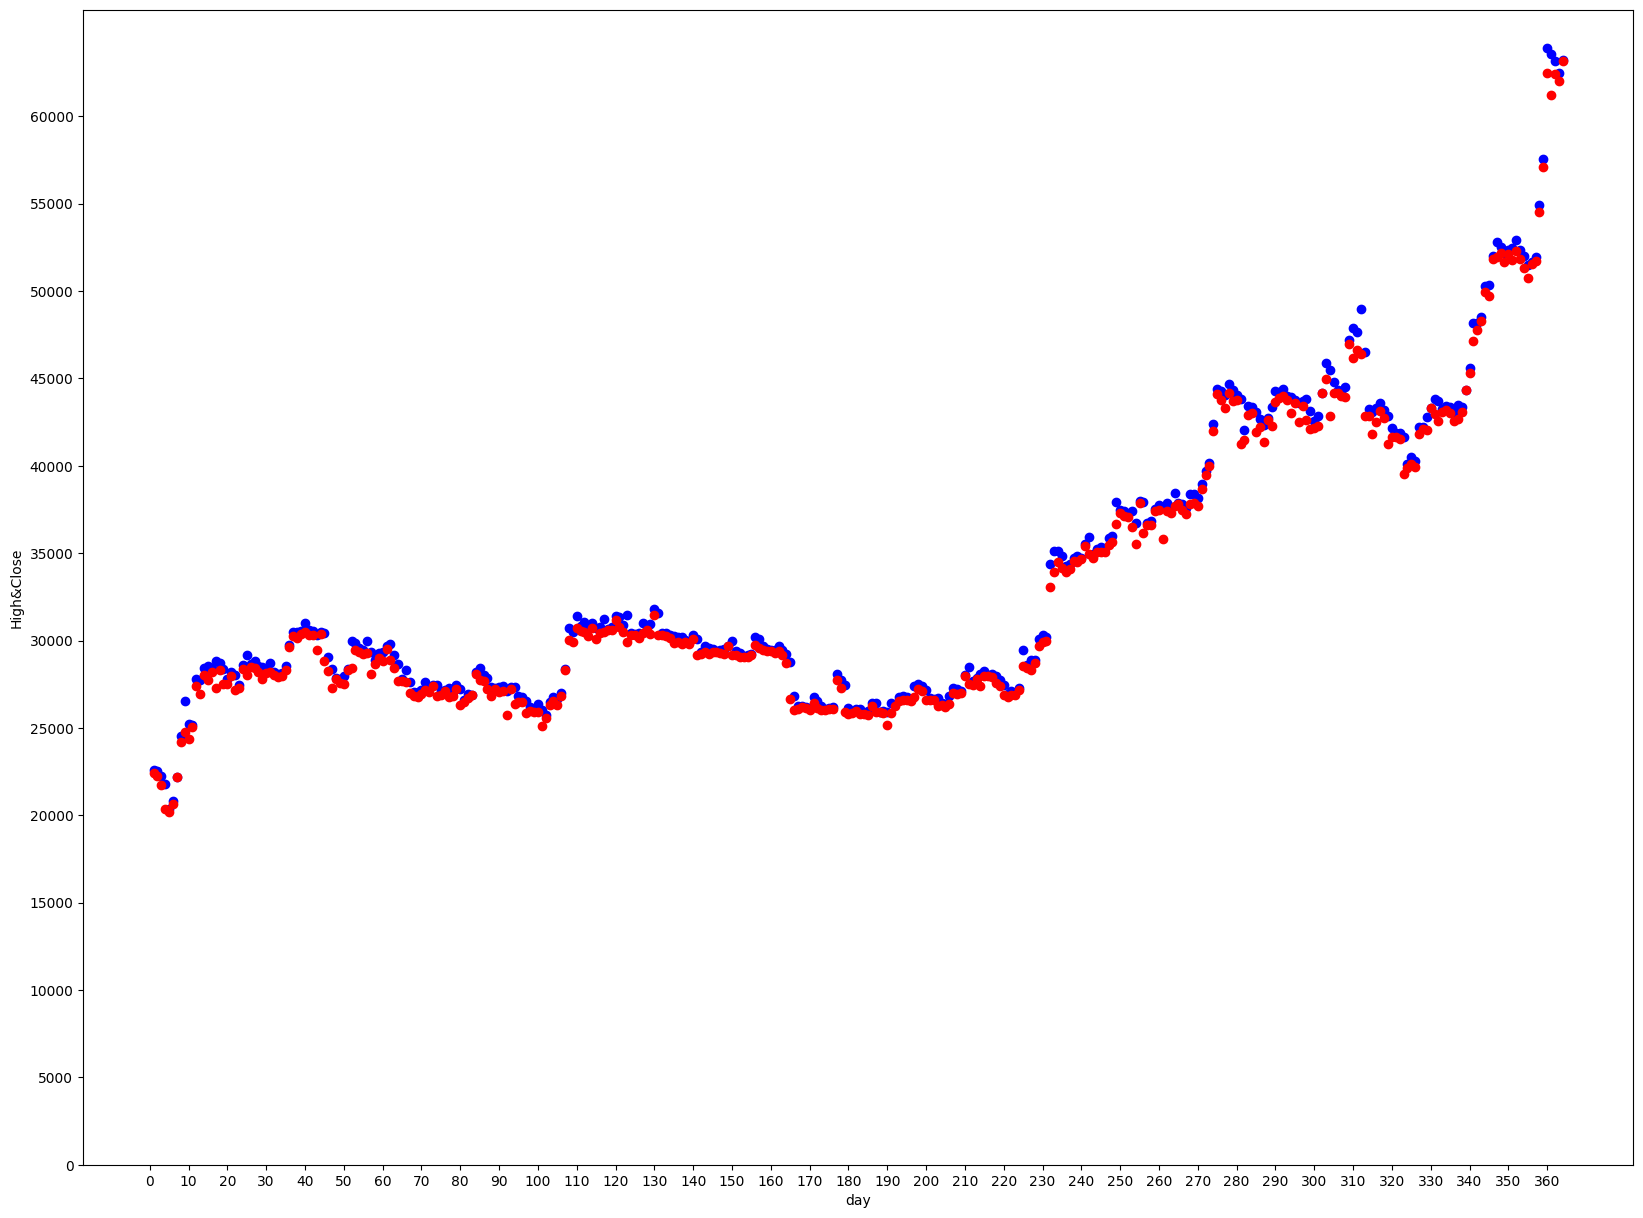

In [5]:
cdf['Close'] = cdf['Close'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf['High'] = cdf['High'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
plt.figure(figsize=(20, 15))
plt.scatter(cdf.Day, cdf.High,  color='blue')
plt.scatter(cdf.Day, cdf.Close, color='red')
plt.xlabel("day")
plt.ylabel("High&Close")
plt.xticks(range(0, max(df.Day) + 1, 10))
plt.yticks(range(0, int(max(cdf.High)) + 1, 5000))
plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train['High'] = train['High'].replace({'\\$': '', ',': ''}, regex=True)
train['Low'] = train['Low'].replace({'\\$': '', ',': ''}, regex=True)
train['Volume'] = train['Volume'].replace({'\\$': '', ',': ''}, regex=True)
train['Market Cap'] = train['Market Cap'].replace({'\\$': '', ',': ''}, regex=True)


x = np.asanyarray(train[['High','Low','Volume','Market Cap']])
y = np.asanyarray(train[['Close']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

Coefficients:  [[1.24858132e-03 3.30889747e-02 3.85441739e-09 4.85471945e-08]]
intercept:  [581.75057981]


C:\Users\He5am\AppData\Local\Temp\ipykernel_6080\1156527938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['High'] = train['High'].replace({'\\$': '', ',': ''}, regex=True)
C:\Users\He5am\AppData\Local\Temp\ipykernel_6080\1156527938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Low'] = train['Low'].replace({'\\$': '', ',': ''}, regex=True)
C:\Users\He5am\AppData\Local\Temp\ipykernel_6080\1156527938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [8]:
test_copy = test.copy()
test_copy['High'] = test_copy['High'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Low'] = test_copy['Low'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Volume'] = test_copy['Volume'].replace({'\\$': '', ',': ''}, regex=True)
test_copy['Market Cap'] = test_copy['Market Cap'].replace({'\\$': '', ',': ''}, regex=True)

y_hat= regr.predict(test_copy[['High','Low','Volume','Market Cap']])
x = np.asanyarray(test_copy[['High','Low','Volume','Market Cap']])
y = np.asanyarray(test[['Close']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 6248.10
Variance score: 1.00


C:\Users\He5am\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
